## **Categorical Data:**
**Categorical data** is a type of data that represents variables with distinct categories or levels. There are two main types of categorical data : ordinal and nominal.
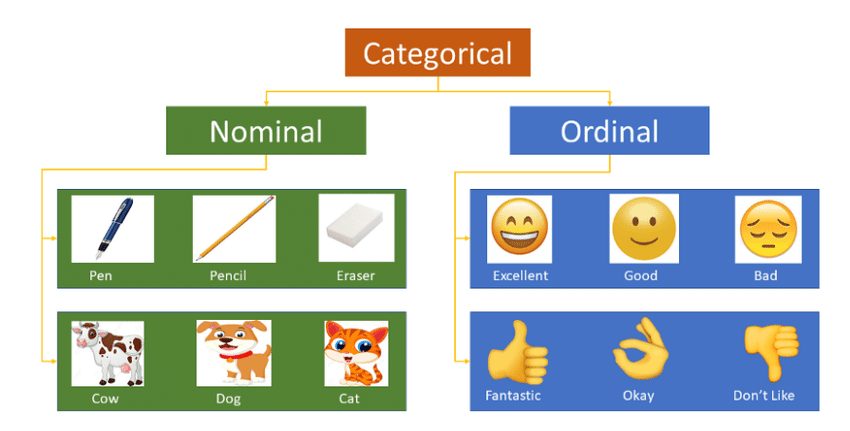

 * **Ordinal data** has categories with a specific order or hierarchy. Examples include rating scales or Likert scales where respondents rate their satisfaction level or agreement on a scale from "Very Unsatisfied" to "Very Satisfied". The order of the categories is important, but the numerical values assigned may not have a specific meaning.

 * **Nominal data** has categories without any inherent order or hierarchy. Examples include colors or different types of fruits. Each category is independent of the others, and no numerical relationship exists between the categories.

Proper **encoding techniques** should be used for categorical data. For ordinal data, label encoding can be applied, preserving the order of the categories. For nominal data, one-hot encoding is commonly used, representing each category as a separate binary feature.

## **Encoding Techniques:**
* **Label Encoding:**
Label encoding is a technique where each unique category or label in a categorical variable is assigned a different numerical value. This is typically done using libraries like scikit-learn's LabelEncoder. Label encoding allows the representation of categorical data in a numeric format, but it does not preserve any inherent order or hierarchy of the categories. The assigned numbers are arbitrary and do not hold any specific meaning.


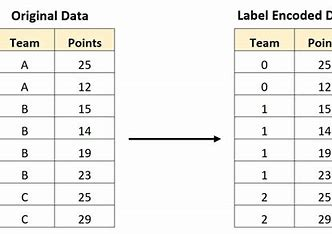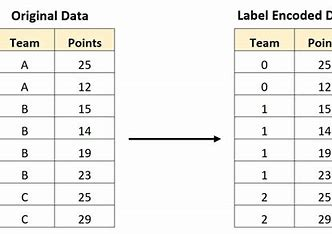

* **One-Hot Encoding:**
One-hot encoding is a technique used to convert categorical variables into binary vectors. Each unique category or label is represented by a separate binary column (or feature), where a value of 1 indicates the presence of that category and 0 indicates its absence. One-hot encoding is typically performed using libraries like pandas' get_dummies() function or scikit-learn's OneHotEncoder. This technique is suitable for nominal categorical variables where there is no inherent order or hierarchy among the categories.


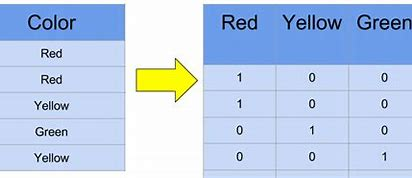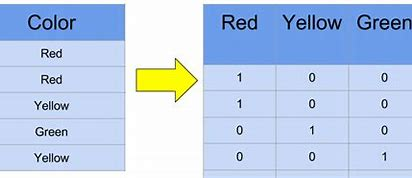


## **Difference between both by practical implementation:**
> ## **One-Hot Encoding**
#### Read and perform preprocessing on Dataset:

In [40]:
import pandas as pd
df = pd.read_csv("homeprices.csv")
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


* **pd.get_dummies():**
The pd.get_dummies() function in pandas is used to perform one-hot encoding on categorical variables. It creates a new DataFrame with binary columns for each unique category in the original variable. By default, it returns dummy-coded data where the presence of a category is represented by 1 and the absence is represented by 0.
To obtain binary values of 0 and 1 instead of boolean True and False values with pd.get_dummies(), you can use the astype(int) method to convert the boolean values to integers.

In [41]:
dummies =pd.get_dummies(df.town).astype(int)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


* By using **pd.concat([df, dummies], axis='columns')**, the code combines the two DataFrames horizontally, aligning them based on their columns. The resulting DataFrame, assigned to the variable merged, contains the original columns from df and the additional columns from dummies.

In [42]:
merged = pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


### **Dummy Variable Trap**

The Dummy Variable Trap refers to a situation in regression analysis where two or more dummy variables created through one-hot encoding are highly correlated or multicollinear . This occurs when one variable can be predicted from the others , leading to difficulties in interpreting the coefficients of the dummy variables in regression models. When using one-hot encoding to represent categorical variables as binary variables (0 or 1), it is common to create dummy variables to represent each category. However, if all dummy variables are included in the regression analysis, perfect multicollinearity can arise. This means that the sum of the dummy variables for all categories will be equal to 1 for all observations, which becomes perfectly correlated with the constant term. As a result, the matrix inversion in the estimation algorithm becomes impossible.

* The code snippet **df = merged.drop(['town', 'west windsor'], axis='columns')**  is dropping the columns 'town' and 'west windsor' from the DataFrame merged. The resulting DataFrame is assigned to the variable df.

It is a common practice to apply the "thumb's rule" when dealing with categorical variables and one-hot encoding to avoid multicollinearity. The rule suggests removing one of the dummy variables to maintain linear independence among the predictors.

The ***reason for removing one of the dummy variables*** is to prevent the issue of multicollinearity, which occurs when there is a high correlation between predictor variables. Multicollinearity can lead to unstable coefficient estimates and difficulties in interpreting the effects of individual predictors.

When creating dummy variables, it is important to remember that the dropped dummy variable serves as the reference category against which the other categories are compared. By comparing the remaining dummy variables to the dropped one, we can understand the effects of different categories in relation to the reference category.

If you do not manually remove one of the dummy variables, some models, such as linear regression, will automatically handle it by excluding one of the dummy variables during the fitting process. This is done to avoid the issue of multicollinearity and non-linearity that can arise when all dummy variables are included.

In [5]:
df = merged.drop(['town', 'west windsor'], axis='columns')
df

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


####  Creating model

In [6]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

#### Define x & y:
* Create **x** as a DataFrame consisting of the input independent variables, and **y** as a variable representing the output or dependent variable that we want to predict or analyze.

In [7]:
x= df.drop('price', axis='columns')
x

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [8]:
y = df.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

#### Train model

In [9]:
#train our model
model.fit(x,y)

LinearRegression()

#### Predict output
* The snippet **model.predict([[2800, 0, 1]])** is using a trained model to predict the 'price' for a new data point with an 'area' value of 2800, 'monroe township' value of 0, and 'robinsville' value of 1.
* The snippet **model.predict([[3400, 0, 0]])** predicts the price based on a new data point with an *'area' value of 3400*, *'monroe township' value of 0*, and *'robinsville' value of 0* using a trained machine learning model.

In [10]:
model.predict([[2800,0,1]])

C:\Users\Mohamed Elhaj Abdou\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [11]:
model.predict([[3400,0,0]])

C:\Users\Mohamed Elhaj Abdou\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

#### Check accuracy

In [12]:
#accuracy 
model.score(x,y)

0.9573929037221873

> ## **Label Encoding**
#### Read and perform preprocessing on data:

In [27]:
df = pd.read_csv("homeprices.csv")
df.head(2)

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000


#### Create Label Encoder
* **le = LabelEncoder()** creates an instance of the LabelEncoder class.

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

* **df.town = le.fit_transform(df.town)** uses the LabelEncoder to encode the values in the 'town' column of the DataFrame df, replacing the original values with encoded labels.

In [29]:
df.town = le.fit_transform(df.town)
df

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


#### Define x & y
* x = df[['town','area']].values creates a new variable x that contains the values of the 'town' and 'area' columns from the DataFrame df. The .values attribute is used to access the underlying NumPy array representation of the DataFrame columns.

When working with machine learning models or certain libraries, it is sometimes necessary to convert the data from a DataFrame format to a NumPy array format. This is because NumPy arrays are more efficient and optimized for numerical computations compared to DataFrames.
The reason for using the NumPy array format in this case could be to pass the data as input to a machine learning model that expects a NumPy array rather than a DataFrame. Many machine learning algorithms and libraries, such as scikit-learn, expect input data in the form of NumPy arrays.


In [30]:
x = df[['town','area']].values 
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [31]:
y= df.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

* The **ColumnTransformer** is initialized with a list of transformers, specifying the name of the column to transform, the transformer to apply (in this case, OneHotEncoder()), and the indices of the columns to apply the transformer to. OneHotEncoder() is applied to column 0 ('town').

* The **remainder='passthrough'** parameter ensures that the remaining columns in the dataset that are not transformed are passed through without any changes.

The commented out part with OneHotEncoder(categorical_features=[0]) is no longer necessary in newer versions of scikit-learn libraries.

In [32]:
from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(categorical_features=[0])
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("town", OneHotEncoder(), [0])], remainder = 'passthrough')


* **x = ct.fit_transform(x)** is used to transform the input data x using the ColumnTransformer ct. It fits the transformer on the data and applies the specified transformations, including one-hot encoding, to the data. The resulting transformed data is assigned back to the variable x.

In [33]:
x= ct.fit_transform(x)
x

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

#### **Dummy Variable Trap**
The ***reason for removing one of the dummy variables*** is to prevent the issue of multicollinearity, which occurs when there is a high correlation between predictor variables. Multicollinearity can lead to unstable coefficient estimates and difficulties in interpreting the effects of individual predictors.


In [34]:
x = x[:,1:]
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

#### Train model

In [35]:
model.fit(x,y)

LinearRegression()

#### Predict Outpupt
* Observe how the output have been same using both technique.

In [36]:
model.predict([[1,0,2800]])#robins

array([590775.63964739])

In [38]:
model.predict([[0,1,3400]])

array([681241.6684584])

#### Check accuracy

In [39]:
 model.score(x,y)

0.9573929037221874

### **NOTE:**  
* If both label encoding and one-hot encoding provide the same output and accuracy score for your dataset, it suggests that the features being encoded do not have an ordinal relationship. In such cases, you can choose either encoding technique based on your preferences and the requirements of your machine learning task.

### **REFERENCES:**
* https://www.youtube.com/watch?v=9yl6-HEY7_s&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=6

### **RELATED ARTICLES:**
* Feature Encoding: https://www.geeksforgeeks.org/feature-encoding-techniques-machine-learning/
* Dummy variable trap: https://www.statology.org/dummy-variable-trap/
* Multicollinearity: https://www.statology.org/multicollinearity-regression/

### **Check out my other notebooks:**
* Sms Spam Filtering | Naive bayes classifier: https://www.kaggle.com/code/sumaiyammaqsood/sms-spam-check-naive-bayes-classifier
* Neural Network | Handwritten Digits Classification: https://www.kaggle.com/code/sumaiyammaqsood/neural-network-handwritten-digits-classification
* NLP Text Preprocessing: https://www.kaggle.com/code/sumaiyammaqsood/nlp-text-preprocessing

Feedback would be greatly appreciated as I continue to delve into various topics and expand my knowledge in this field. Your insights and suggestions are invaluable in helping me improve and provide more content like this. Thank you for your support and input!